In [0]:
import zipfile

zip_path = '/content/drive/My Drive/Colab Notebooks/lgg-mri-segmentation.zip'
fantasy_zip = zipfile.ZipFile(zip_path)
fantasy_zip.extractall('/content/drive/My Drive/Colab Notebooks')
fantasy_zip.close()

In [0]:
os.remove('/content/drive/My Drive/Colab Notebooks/kaggle_3m/data.csv')
os.remove('/content/drive/My Drive/Colab Notebooks/kaggle_3m/README.md')


In [0]:
import os 

# This is the directory where we have our dataset
origin_dir ='/content/drive/My Drive/Colab Notebooks/kaggle_3m'

# This is the directory where we will split our dataset
base_dir = '/content/drive/My Drive/Colab Notebooks/dataset'

if os.path.isdir(base_dir):
  train_dir = os.path.join(base_dir, 'train')
  validation_dir = os.path.join(base_dir, 'validation')
  test_dir = os.path.join(base_dir, 'test')
  
else:
  
  os.mkdir(base_dir)

  # Directories for our training, validation and test splits
  train_dir = os.path.join(base_dir, 'train')
  os.mkdir(train_dir)
  train_img_dir = os.path.join(train_dir, 'img')
  os.mkdir(train_img_dir)
  train_mask_dir = os.path.join(train_dir, 'mask')
  os.mkdir(train_mask_dir)

  validation_dir = os.path.join(base_dir, 'validation')
  os.mkdir(validation_dir)
  validation_img_dir = os.path.join(validation_dir, 'img')
  os.mkdir(validation_img_dir)
  validation_mask_dir = os.path.join(validation_dir, 'mask')
  os.mkdir(validation_mask_dir)

  test_dir = os.path.join(base_dir, 'test')
  os.mkdir(test_dir)
  test_img_dir = os.path.join(test_dir, 'img')
  os.mkdir(test_img_dir)
  test_mask_dir = os.path.join(test_dir, 'mask')
  os.mkdir(test_mask_dir)

In [112]:
import shutil
file_list = os.listdir(origin_dir)
len(file_list)

110

In [0]:
import shutil
file_list = os.listdir(origin_dir)

train_num = 90
val_num = 10
test_num = 10

for idx in range(train_num):
  
  fdir = file_list[idx]
  src = os.path.join(origin_dir, fdir)
  img_list = os.listdir(src)
  len(img_list)

  for i in range(1,int(len(img_list)/2)+1):
    img_fnames = str(fdir)+'_'+str(i)+'.tif'
    mask_fnames = str(fdir)+'_'+str(i)+'_mask.tif'
    
    src_img = os.path.join(origin_dir, fdir, img_fnames)
    dst_img = os.path.join(train_img_dir, img_fnames)
    
    src_mask = os.path.join(origin_dir, fdir, mask_fnames)
    dst_mask = os.path.join(train_mask_dir, mask_fnames)
    
    if os.path.isfile(str(src_img)):
      if os.path.isfile(str(src_mask)):
        shutil.copyfile(src_img, dst_img)
        shutil.copyfile(src_mask, dst_mask)


In [0]:
for idx in range(train_num,train_num+val_num):
  
  fdir = file_list[idx]
  src = os.path.join(origin_dir, fdir)
  img_list = os.listdir(src)
  len(img_list)

  for i in range(1,int(len(img_list)/2)+1):
    img_fnames = str(fdir)+'_'+str(i)+'.tif'
    mask_fnames = str(fdir)+'_'+str(i)+'_mask.tif'
    
    src_img = os.path.join(origin_dir, fdir, img_fnames)
    dst_img = os.path.join(validation_img_dir, img_fnames)
    
    src_mask = os.path.join(origin_dir, fdir, mask_fnames)
    dst_mask = os.path.join(validation_mask_dir, mask_fnames)
    
    if os.path.isfile(str(src_img)):
      if os.path.isfile(str(src_mask)):
        shutil.copyfile(src_img, dst_img)
        shutil.copyfile(src_mask, dst_mask)

In [0]:
for idx in range(train_num+val_num,train_num+val_num+test_num):
  
  fdir = file_list[idx]
  src = os.path.join(origin_dir, fdir)
  img_list = os.listdir(src)
  len(img_list)

  for i in range(1,int(len(img_list)/2)+1):
    img_fnames = str(fdir)+'_'+str(i)+'.tif'
    mask_fnames = str(fdir)+'_'+str(i)+'_mask.tif'
    
    src_img = os.path.join(origin_dir, fdir, img_fnames)
    dst_img = os.path.join(test_img_dir, img_fnames)
    
    src_mask = os.path.join(origin_dir, fdir, mask_fnames)
    dst_mask = os.path.join(test_mask_dir, mask_fnames)
    
    if os.path.isfile(str(src_img)):
      if os.path.isfile(str(src_mask)):
        shutil.copyfile(src_img, dst_img)
        shutil.copyfile(src_mask, dst_mask)

In [0]:
from keras.utils import Sequence
from scipy import io
import matplotlib.pyplot as plt
from keras.utils import plot_model
from keras.preprocessing import image
import numpy as np

In [0]:
class data_generator(Sequence):
    def __init__(self,image_folder,batch_size=3,shuffle=True):
        self.image_folder = image_folder
        self.batch_size = batch_size
        self.on_epoch_end()
        
    def __len__(self):
        return int(np.floor(10/self.batch_size))
    
    def __getitem__(self, idx):
        
        batch_size = self.batch_size
        image_folder = self.image_folder
        
        x_train = []
        y_train = []
        
        img_list = os.listdir(os.path.join(image_folder, 'img'))
        #all_img_feats = list()
        batch_img = img_list[idx * self.batch_size : (idx + 1) * self.batch_size]
        
        mask_list = os.listdir(os.path.join(image_folder, 'mask'))
        #all_img_feats = list()
        batch_mask = mask_list[idx * self.batch_size : (idx + 1) * self.batch_size]

        for imgf in batch_img:
            img_path = os.path.join(image_folder, 'img', imgf)
            flair_img = np.array(image.load_img(img_path, target_size=(128, 128), color_mode = "grayscale"))           
            x = np.reshape(flair_img,[1,128,128,1])
            x_train.append(x)
            
        for maskf in batch_mask:
            mask_path = os.path.join(image_folder, 'mask', maskf)
            mask = np.array(image.load_img(mask_path, target_size=(128, 128), color_mode = "grayscale"))            
            y = np.reshape(mask,[1,128,128,1])
            y_train.append(y)
            
        x_train = np.concatenate(x_train, axis=0)
        y_train = np.concatenate(y_train, axis=0)
        
        return x_train, y_train

In [0]:
test = data_generator(train_dir,6)

In [121]:
test[10][0].shape

(6, 128, 128, 1)

(-0.5, 127.5, 127.5, -0.5)

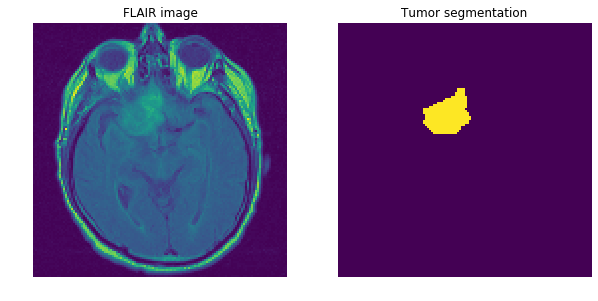

In [122]:
test = data_generator(train_dir,1)

plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow(np.squeeze(test[10][0]))
plt.title("FLAIR image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(np.squeeze(test[10][1]))
plt.title("Tumor segmentation")
plt.axis("off")

In [0]:
import os
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler



def unet(X1,ksize=7):
    
    conv1 = Conv2D(64, ksize, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(X1)
    conv1 = Conv2D(64, ksize, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    Maxpool1 = MaxPooling2D(pool_size = (2, 2))(conv1)

    conv2 = Conv2D(128, ksize, activation = 'relu', padding = 'same' , kernel_initializer = 'he_normal')(Maxpool1)
    conv2 = Conv2D(128, ksize, activation = 'relu', padding = 'same' , kernel_initializer = 'he_normal')(conv2)
    Maxpool2 = MaxPooling2D(pool_size = (2, 2))(conv2)

    conv3 = Conv2D(256, ksize, activation = 'relu', padding = 'same' , kernel_initializer = 'he_normal')(Maxpool2)
    conv3 = Conv2D(256, ksize, activation = 'relu', padding = 'same' , kernel_initializer = 'he_normal')(conv3)
    Maxpool3 = MaxPooling2D(pool_size = (2, 2))(conv3)

    conv4 = Conv2D(512, ksize, activation = 'relu', padding = 'same' , kernel_initializer = 'he_normal')(Maxpool3)
    conv4 = Conv2D(512, ksize, activation = 'relu', padding = 'same' , kernel_initializer = 'he_normal')(conv4)
    Maxpool4 = MaxPooling2D(pool_size = (2, 2))(conv4)

    conv5 = Conv2D(1024, ksize, activation = 'relu', padding = 'same' , kernel_initializer = 'he_normal')(Maxpool4)
    conv5 = Conv2D(1024, ksize, activation = 'relu', padding = 'same' , kernel_initializer = 'he_normal')(conv5)

    Up6 = Conv2D(512, ksize, activation = 'relu', padding = 'same' , kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv5))
    merge6 = concatenate([conv4,Up6], axis = 3)
    conv6 = Conv2D(512, ksize, activation = 'relu', padding = 'same' , kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, ksize, activation = 'relu', padding = 'same' , kernel_initializer = 'he_normal')(conv6)

    Up7 = Conv2D(256, ksize, activation = 'relu', padding = 'same' , kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,Up7], axis = 3)
    conv7 = Conv2D(256, ksize, activation = 'relu', padding = 'same' , kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, ksize, activation = 'relu', padding = 'same' , kernel_initializer = 'he_normal')(conv7)

    Up8 = Conv2D(128, ksize, activation = 'relu', padding = 'same' , kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,Up8], axis = 3)
    conv8 = Conv2D(128, ksize, activation = 'relu', padding = 'same' , kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, ksize, activation = 'relu', padding = 'same' , kernel_initializer = 'he_normal')(conv8)

    Up9 = Conv2D(64, ksize, activation = 'relu', padding = 'same' , kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,Up9], axis = 3)
    conv9 = Conv2D(64, ksize, activation = 'relu', padding = 'same' , kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, ksize, activation = 'relu', padding = 'same' , kernel_initializer = 'he_normal')(conv9)                                                                                               
    conv10 = Conv2D(1, 1, activation = 'relu', padding = 'same' , kernel_initializer = 'he_normal')(conv9)
    
    out = Model(input = X1, output = conv10)
    
    return out


In [0]:
X1 = Input((None,None,1))
model = unet(X1,3)
model.compile(optimizer=Adam(lr=0.0001), loss='mean_absolute_error')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [0]:
import numpy as np
import tensorflow as tf
from keras.models import *
from keras.layers import Input,Activation, merge, Conv2D,Lambda, MaxPooling2D, UpSampling2D, Dropout, Cropping2D, Add, Conv2DTranspose, multiply, Input
from keras.optimizers import *
from keras import backend as K
from keras.utils import multi_gpu_model, HDF5Matrix, Sequence
from scipy import io
import matplotlib.pyplot as plt

In [0]:
train_gen = data_generator(train_dir,1)
val_gen = data_generator(validation_dir,1)

model.fit_generator(generator = train_gen, epochs=200, validation_steps = 5, verbose = 1, shuffle="batch") 


Epoch 1/200
10/10 [==============================] - 34s 3s/step - loss: 3.0442e-05
Epoch 2/200
10/10 [==============================] - 26s 3s/step - loss: 0.0000e+00
Epoch 3/200
10/10 [==============================] - 26s 3s/step - loss: 0.0000e+00
Epoch 4/200
10/10 [==============================] - 26s 3s/step - loss: 0.0000e+00
Epoch 5/200
10/10 [==============================] - 27s 3s/step - loss: 0.0000e+00
Epoch 6/200
10/10 [==============================] - 27s 3s/step - loss: 0.0000e+00
Epoch 7/200
10/10 [==============================] - 27s 3s/step - loss: 0.0000e+00
Epoch 8/200
10/10 [==============================] - 26s 3s/step - loss: 0.0000e+00
Epoch 9/200
10/10 [==============================] - 26s 3s/step - loss: 0.0000e+00
Epoch 10/200
10/10 [==============================] - 26s 3s/step - loss: 0.0000e+00
Epoch 11/200
10/10 [==============================] - 26s 3s/step - loss: 0.0000e+00
Epoch 12/200
10/10 [==============================] - 26s 3s/step - loss: 

KeyboardInterrupt: ignored